In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
# Right click on the BANA6350>Data folder and copy the folder path by click "Copy Path". Then paste that inside the code below to link your folder where all the data will reside

import os

path = "/content/gdrive/MyDrive/BANA7350/Data"

os.chdir(path)

# the above code will change your current working directory to the path i.e., BANA6350/Data folder
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('a10.csv').head()

Mounted at /content/gdrive/


,index,a10
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [ ]:
!pip install fredapi

In [ ]:
from fredapi import Fred #importing Fred from fredapi
fred = Fred(api_key="9e0f82a9fddc7a0463c03b379d992d96") #creating a variable called fred with my api key

In [ ]:
import pandas as pd

df = pd.read_csv('ASPNHSUS.csv', header=0, parse_dates=True, index_col=0) #reading the downloaded data
df

,ASPNHSUS,HNFSUSNSA,UNRATENSA,MSACSR
DATE,,,,
1975-01-01,39500,345,9.0,9.9
1975-02-01,40600,339,9.1,10.4
1975-03-01,42100,330,9.1,8.9
1975-04-01,42000,325,8.6,7.2
1975-05-01,43200,321,8.3,6.8
...,...,...,...,...
2024-02-01,509700,457,4.2,8.7
2024-03-01,522500,455,3.9,8.2
2024-04-01,499200,459,3.5,7.7


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.stats.diagnostic as dg
from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
from datetime import datetime, timedelta


In [ ]:
X = df['HNFSUSNSA']
X

DATE
1975-01-01    345
1975-02-01    339
1975-03-01    330
1975-04-01    325
1975-05-01    321
             ... 
2024-02-01    457
2024-03-01    455
2024-04-01    459
2024-05-01    469
2024-06-01    475
Name: HNFSUSNSA, Length: 594, dtype: int64

In [ ]:
X = sm.add_constant(X)
X

,const,HNFSUSNSA
DATE,,
1975-01-01,1.0,345
1975-02-01,1.0,339
1975-03-01,1.0,330
1975-04-01,1.0,325
1975-05-01,1.0,321
...,...,...
2024-02-01,1.0,457
2024-03-01,1.0,455
2024-04-01,1.0,459


In [ ]:
Y = df['ASPNHSUS']
Y

DATE
1975-01-01     39500
1975-02-01     40600
1975-03-01     42100
1975-04-01     42000
1975-05-01     43200
               ...  
2024-02-01    509700
2024-03-01    522500
2024-04-01    499200
2024-05-01    504500
2024-06-01    487200
Name: ASPNHSUS, Length: 594, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, shuffle=False)   # Note here, we put shuffle=False, since this is a Time Series Data, we want to keep the Time series sequential in time

X_train
X_test
Y_train
Y_test


DATE
2014-08-01    356200
2014-09-01    319100
2014-10-01    377500
2014-11-01    348900
2014-12-01    373200
               ...  
2024-02-01    509700
2024-03-01    522500
2024-04-01    499200
2024-05-01    504500
2024-06-01    487200
Name: ASPNHSUS, Length: 119, dtype: int64

In [ ]:
model = sm.OLS(Y_train, X_train, missing='drop')     # note : OLS() needs to be capitalized, missing drop means we are asking
                                         #        removal of data with missing values from regression
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.276
Date:                Sun, 28 Jul 2024   Prob (F-statistic):              0.259
Time:                        21:50:19   Log-Likelihood:                -6062.8
No. Observations:                 475   AIC:                         1.213e+04
Df Residuals:                     473   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.912e+05   1.54e+04     12.400      0.000    1.61e+05    2.22e+05
HNFSUSNSA    -51.2954     45.406     -1.130      0.259    -140.517      37.926
==============================================================================
Omnibus:                      179.567   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.359
Skew:                           0.269   Prob(JB):                     2.56e-07
Kurtosis:                       1.885   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fit.params

const        191220.292696
HNFSUSNSA       -51.295408
dtype: float64

In [ ]:
Y_fitted = fit.fittedvalues
Y_fitted

DATE
1975-01-01    173523.377083
1975-02-01    173831.149528
1975-03-01    174292.808196
1975-04-01    174549.285234
1975-05-01    174754.466864
                  ...      
2014-03-01    181628.051480
2014-04-01    181576.756072
2014-05-01    181422.869849
2014-06-01    181115.097404
2014-07-01    180653.438736
Length: 475, dtype: float64

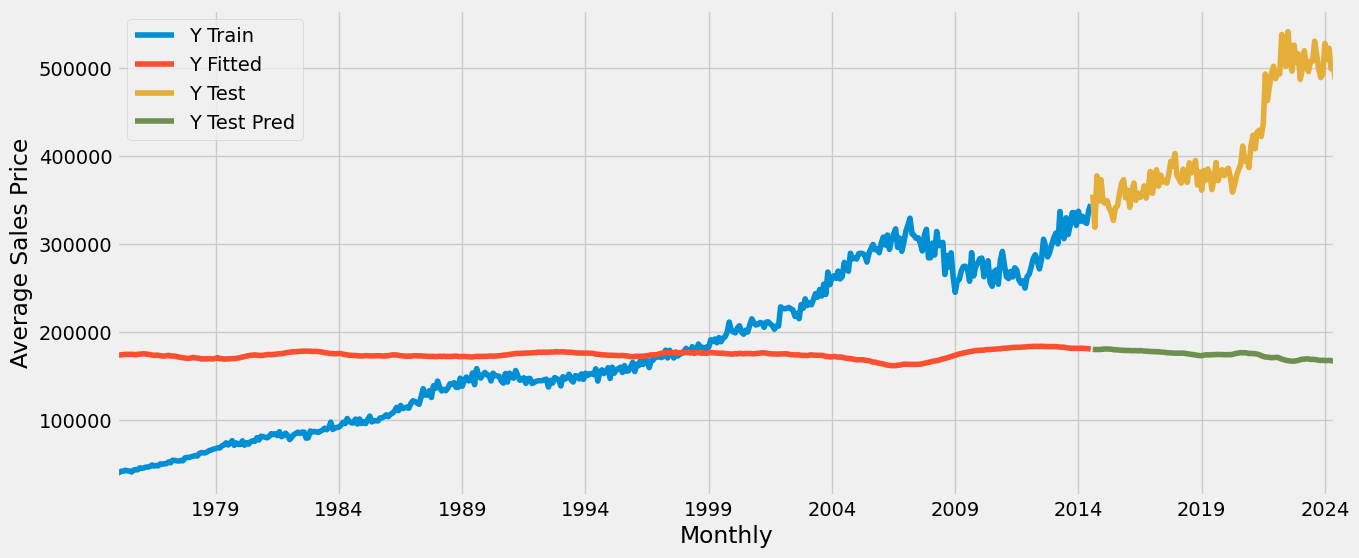

In [ ]:
Y_test_pred = fit.predict(X_test)  # the new RunTime values appear from the 31 index position and below


# Plotting the resutls

Y_train.plot(label='Y Train')
Y_fitted.plot(label='Y Fitted')
Y_test.plot(label='Y Test')
Y_test_pred.plot(label='Y Test Pred')
plt.xlabel('Monthly')
plt.ylabel('Average Sales Price')
plt.legend()
plt.show()


In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 7.3 MB/s eta 0:00:00


In [ ]:
def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import r2_score
    R_sq= r2_score(y_test,y_pred)
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    print('R-SQ : %f' % R_sq, ' RMSE : %f' % RMSE, ' RMSPE : %f' % RMSPE, ' MAE : %f' % MAE, ' MSE : %f' % MSE , ' MAPE : %f' % MAPE)


In [ ]:

accuracy(Y_train,Y_fitted)
accuracy(Y_test, Y_test_pred)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


R-SQ : 0.002691  RMSE : 84520.904191  RMSPE : 9.401196  MAE : 72043.572748  MSE : 7143783245.318968  MAPE : 0.618118
R-SQ : -14.518932  RMSE : 247281.614385  RMSPE : 5.708388  MAE : 238132.018410  MSE : 61148196812.848320  MAPE : 0.566609


In [ ]:
df

,ASPNHSUS,HNFSUSNSA,UNRATENSA,MSACSR
DATE,,,,
1975-01-01,39500,345,9.0,9.9
1975-02-01,40600,339,9.1,10.4
1975-03-01,42100,330,9.1,8.9
1975-04-01,42000,325,8.6,7.2
1975-05-01,43200,321,8.3,6.8
...,...,...,...,...
2024-02-01,509700,457,4.2,8.7
2024-03-01,522500,455,3.9,8.2
2024-04-01,499200,459,3.5,7.7


In [ ]:
X1 = df[['HNFSUSNSA', 'UNRATENSA', 'MSACSR']]
X1


,HNFSUSNSA,UNRATENSA,MSACSR
DATE,,,
1975-01-01,345,9.0,9.9
1975-02-01,339,9.1,10.4
1975-03-01,330,9.1,8.9
1975-04-01,325,8.6,7.2
1975-05-01,321,8.3,6.8
...,...,...,...
2024-02-01,457,4.2,8.7
2024-03-01,455,3.9,8.2
2024-04-01,459,3.5,7.7


In [ ]:
X1 = sm.add_constant(X1)
X1

,const,HNFSUSNSA,UNRATENSA,MSACSR
DATE,,,,
1975-01-01,1.0,345,9.0,9.9
1975-02-01,1.0,339,9.1,10.4
1975-03-01,1.0,330,9.1,8.9
1975-04-01,1.0,325,8.6,7.2
1975-05-01,1.0,321,8.3,6.8
...,...,...,...,...
2024-02-01,1.0,457,4.2,8.7
2024-03-01,1.0,455,3.9,8.2
2024-04-01,1.0,459,3.5,7.7


In [ ]:
Y1 = df['ASPNHSUS']
Y1

DATE
1975-01-01     39500
1975-02-01     40600
1975-03-01     42100
1975-04-01     42000
1975-05-01     43200
               ...  
2024-02-01    509700
2024-03-01    522500
2024-04-01    499200
2024-05-01    504500
2024-06-01    487200
Name: ASPNHSUS, Length: 594, dtype: int64

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=42, shuffle=False)   # Note here, we put shuffle=False, since this is a Time Series Data, we want to keep the Time series sequential in time

X1_train
X1_test
Y1_train
Y1_test

DATE
2014-08-01    356200
2014-09-01    319100
2014-10-01    377500
2014-11-01    348900
2014-12-01    373200
               ...  
2024-02-01    509700
2024-03-01    522500
2024-04-01    499200
2024-05-01    504500
2024-06-01    487200
Name: ASPNHSUS, Length: 119, dtype: int64

In [ ]:
model = sm.OLS(Y1_train, X1_train, missing='drop')     # note : OLS() needs to be capitalized, missing drop means we are asking
                                         #        removal of data with missing values from regression
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     15.69
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           9.72e-10
Time:                        21:51:34   Log-Likelihood:                -6040.8
No. Observations:                 475   AIC:                         1.209e+04
Df Residuals:                     471   BIC:                         1.211e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.727e+05   3.07e+04     12.156      0.000    3.12e+05    4.33e+05
HNFSUSNSA   -251.3361     57.736     -4.353      0.000    -364.788    -137.884
UNRATENSA  -1.914e+04   3125.076     -6.126      0.000   -2.53e+04    -1.3e+04
MSACSR      1527.7681   2503.860      0.610      0.542   -3392.351    6447.887
==============================================================================
Omnibus:                      125.538   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.070
Skew:                           0.636   Prob(JB):                     4.93e-12
Kurtosis:                       1.993   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fit.params

const        372650.075700
HNFSUSNSA      -251.336092
UNRATENSA    -19143.740930
MSACSR         1527.768065
dtype: float64

In [ ]:
Y1_fitted = fit.fittedvalues
Y1_fitted

DATE
1975-01-01    128770.359333
1975-02-01    129127.885827
1975-03-01    129098.258560
1975-04-01    137329.603775
1975-05-01    143466.963197
                  ...      
2014-03-01    204028.289283
2014-04-01    221159.096833
2014-05-01    215812.456338
2014-06-01    211239.575631
2014-07-01    205912.686647
Length: 475, dtype: float64

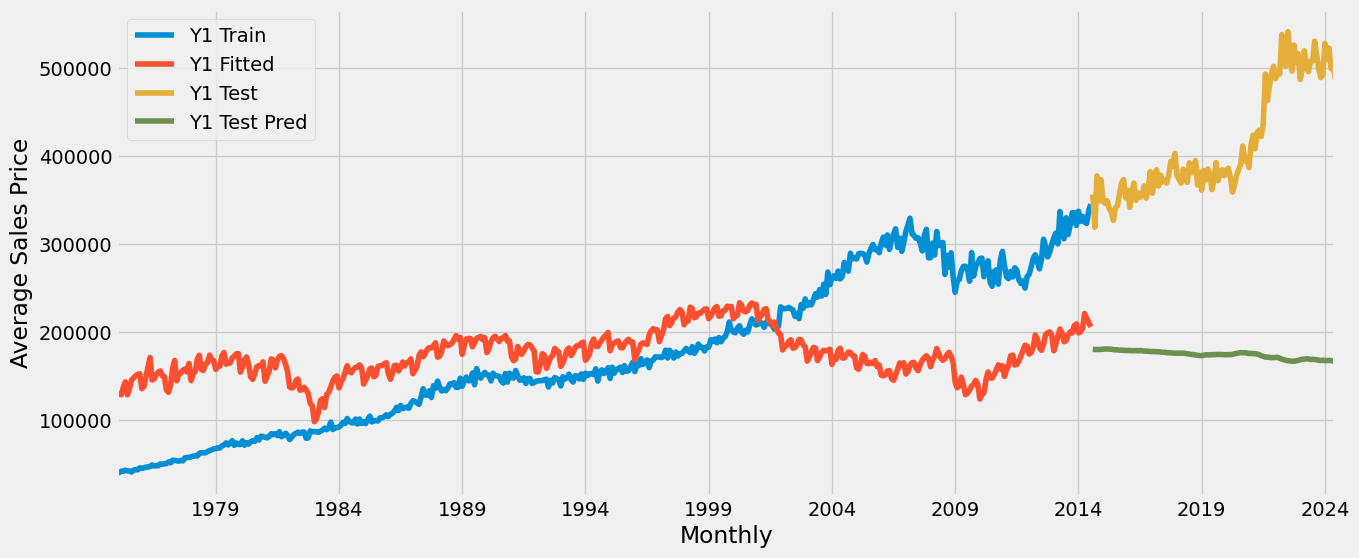

In [ ]:
Y1_test_pred = fit.predict(X1_test)  # the new RunTime values appear from the 31 index position and below


# Plotting the resutls

Y_train.plot(label='Y1 Train')
Y_fitted.plot(label='Y1 Fitted')
Y_test.plot(label='Y1 Test')
Y_test_pred.plot(label='Y1 Test Pred')
plt.xlabel('Monthly')
plt.ylabel('Average Sales Price')
plt.legend()
plt.show()

In [ ]:
def accuracy(y1_test,y1_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import r2_score
    R_sq= r2_score(y1_test,y1_pred)
    RMSE = rmse(y1_test,y1_pred)
    RMSPE = rmspe(y1_test,y1_pred)
    MAE = meanabs(y1_test,y1_pred)
    MSE =  mse(y1_test,y1_pred)
    MAPE = mean_absolute_percentage_error(y1_test,y1_pred)
    print('R-SQ : %f' % R_sq, ' RMSE : %f' % RMSE, ' RMSPE : %f' % RMSPE, ' MAE : %f' % MAE, ' MSE : %f' % MSE , ' MAPE : %f' % MAPE)

accuracy(Y1_train,Y1_fitted)
accuracy(Y1_test, Y1_test_pred)

R-SQ : 0.090833  RMSE : 80699.565796  RMSPE : 7.744062  MAE : 69938.364546  MSE : 6512419919.712864  MAPE : 0.548798
R-SQ : -10.959220  RMSE : 217076.267865  RMSPE : 4.952365  MAE : 203493.676313  MSE : 47122106070.081680  MAPE : 0.480051


In [ ]:
#Accuracy Comparison
#Single Linear Regression: R-SQ : -14.518932  RMSE : 247281.614385  RMSPE : 5.708388  MAE : 238132.018410  MSE : 61148196812.848320  MAPE : 0.566609
#Multi Linear Regression: R-SQ : -10.959220  RMSE : 217076.267865  RMSPE : 4.952365  MAE : 203493.676313  MSE : 47122106070.081680  MAPE : 0.480051

In [51]:
Y1_fitted

DATE
1975-01-01    128770.359333
1975-02-01    129127.885827
1975-03-01    129098.258560
1975-04-01    137329.603775
1975-05-01    143466.963197
                  ...      
2014-03-01    204028.289283
2014-04-01    221159.096833
2014-05-01    215812.456338
2014-06-01    211239.575631
2014-07-01    205912.686647
Length: 475, dtype: float64

In [52]:
Y1_test_pred = fit.predict(X1_test)  # the new RunTime values appear from the 31 index position and below
Y1_test_pred


DATE
2014-08-01    207765.212103
2014-09-01    218246.112292
2014-10-01    221922.083671
2014-11-01    222784.526990
2014-12-01    223782.240243
                  ...      
2024-02-01    190677.351777
2024-03-01    196159.262208
2024-04-01    202047.530178
2024-05-01    197844.296361
2024-06-01    185155.588862
Length: 119, dtype: float64

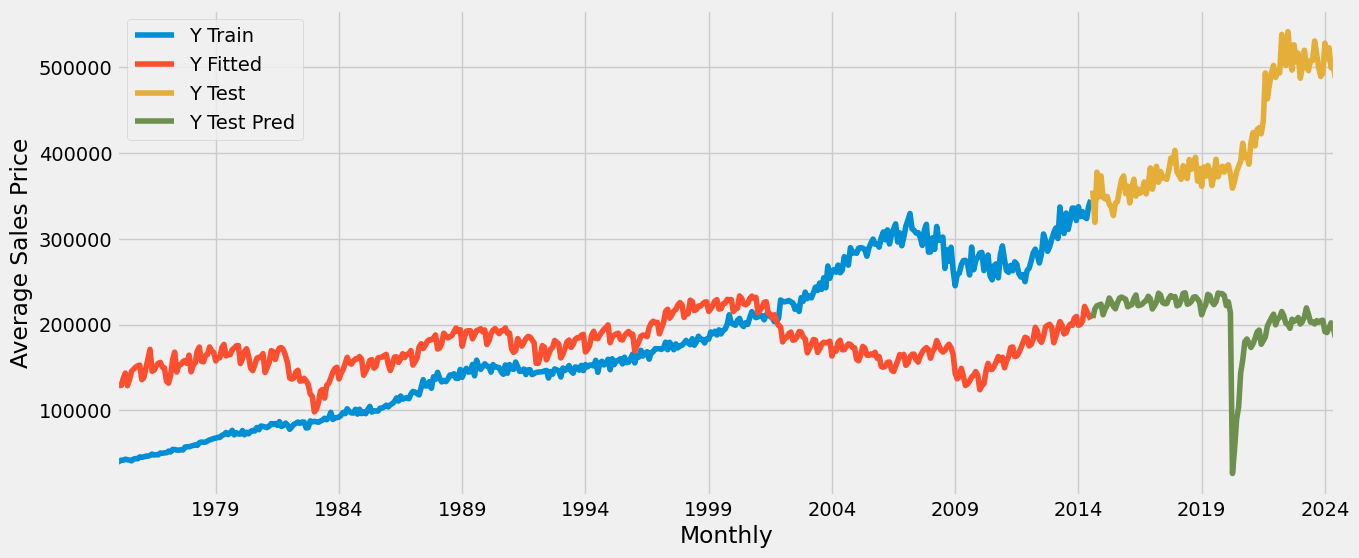

In [53]:
Y1_train.plot(label='Y Train')
Y1_fitted.plot(label='Y Fitted')
Y1_test.plot(label='Y Test')
Y1_test_pred.plot(label='Y Test Pred')
plt.xlabel('Monthly')
plt.ylabel('Average Sales Price')
plt.legend()
plt.show()


Text(0, 0.5, 'Predicted Values')

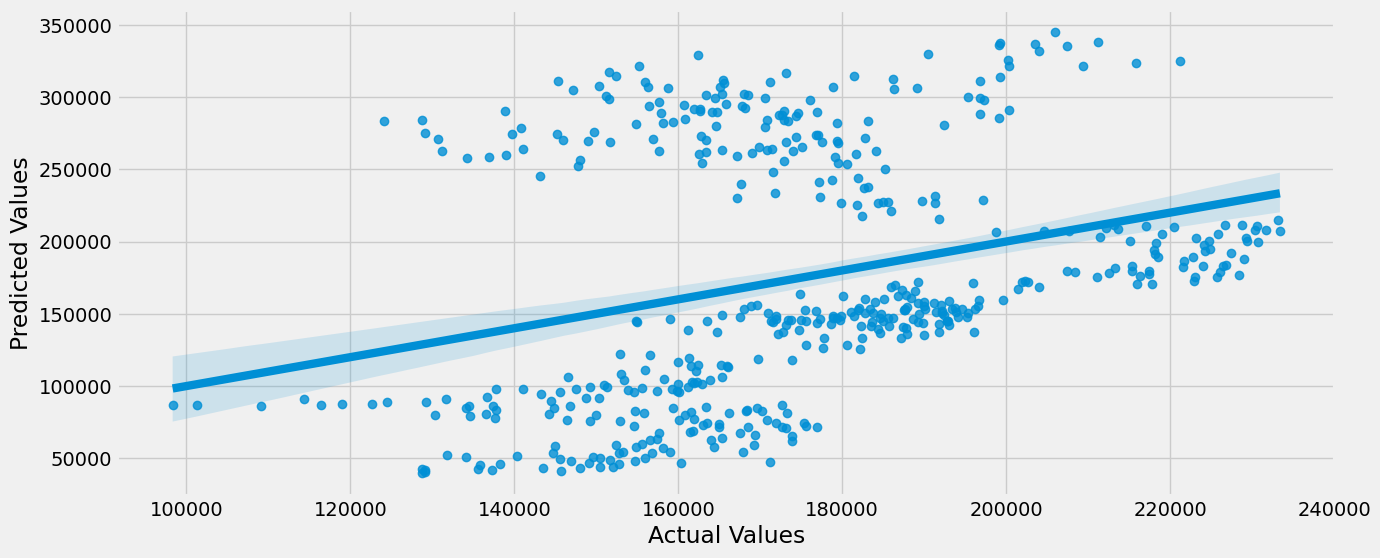

In [57]:
#Y/N Linear Relationship
sns.regplot(x=fit.fittedvalues,y=Y1_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



<Axes: ylabel='Frequency'>

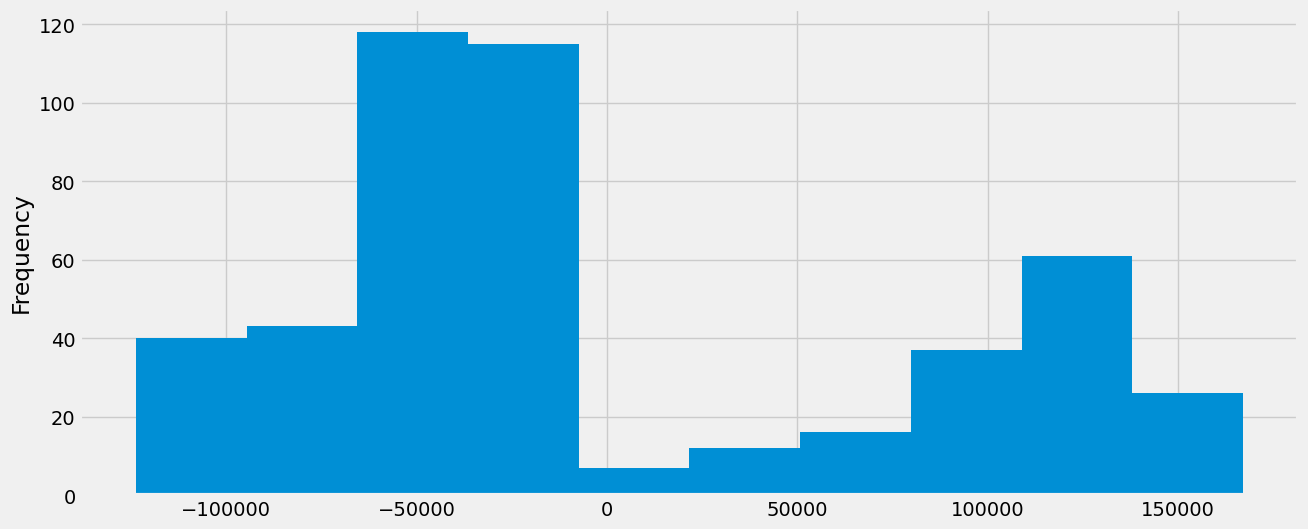

In [58]:
fit.resid.plot(kind='hist')

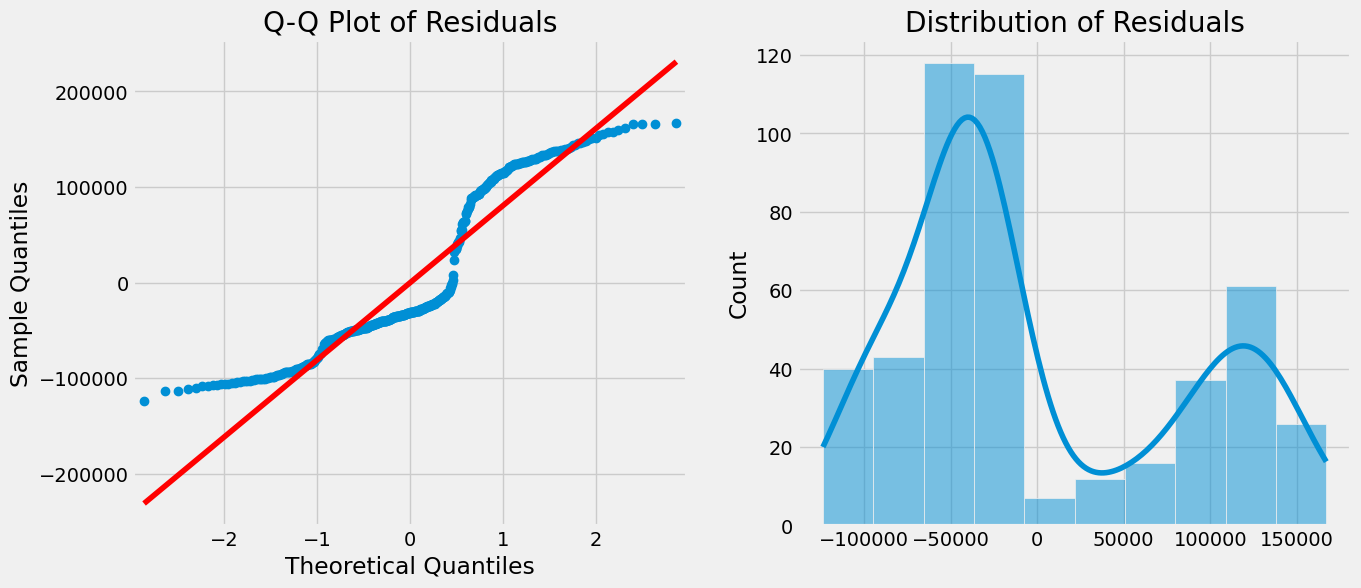

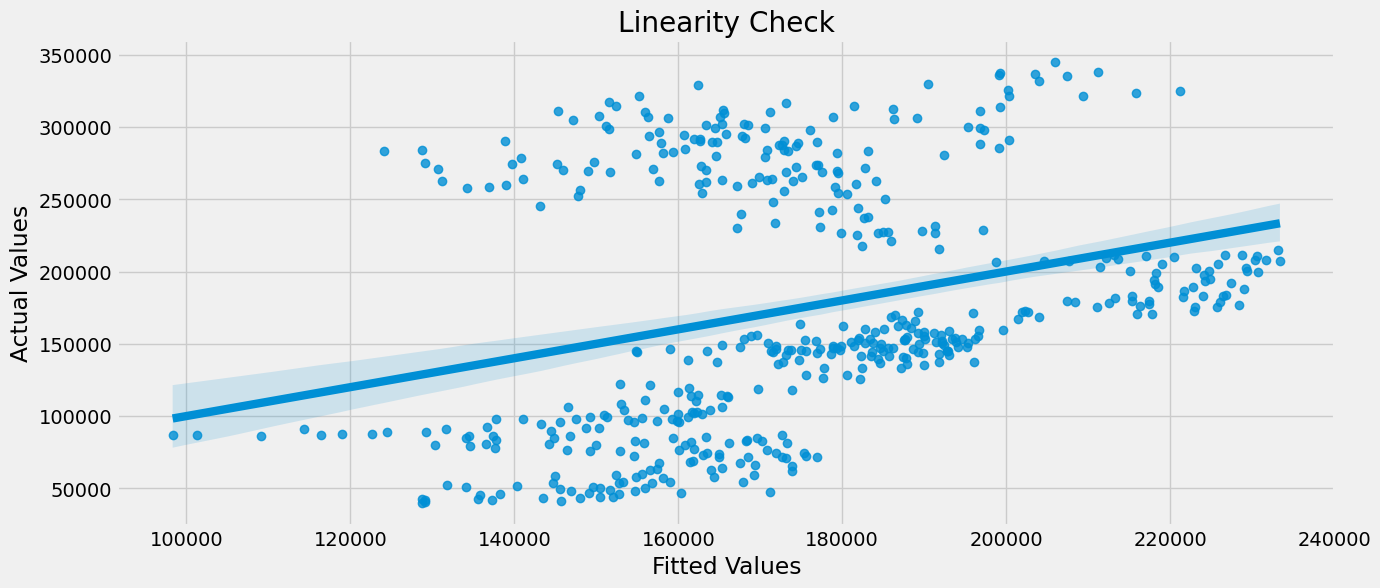

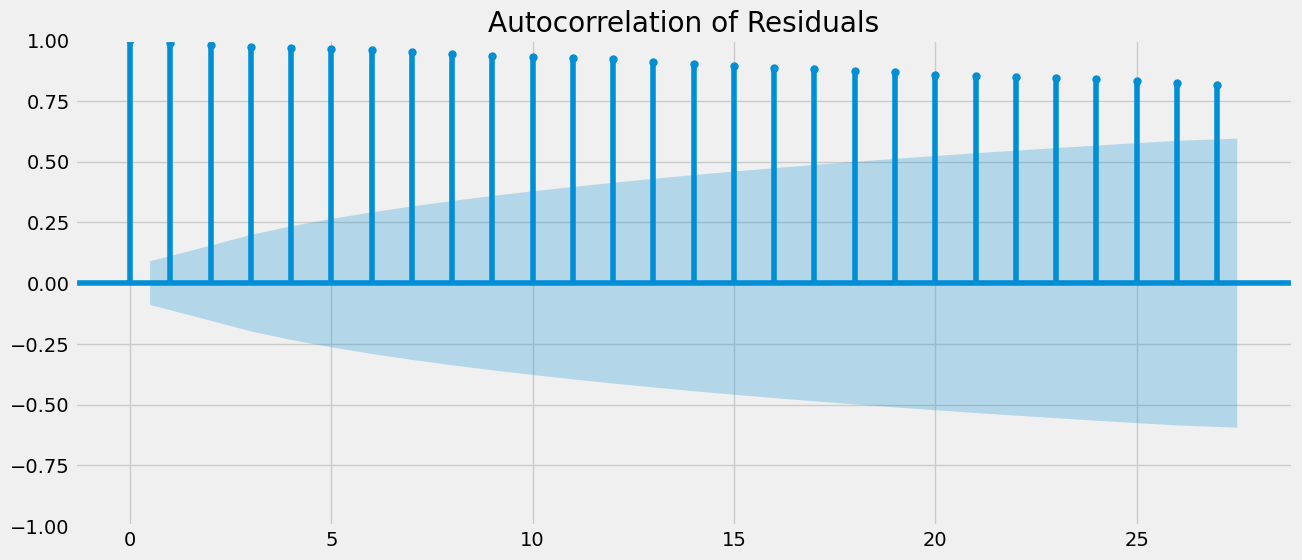

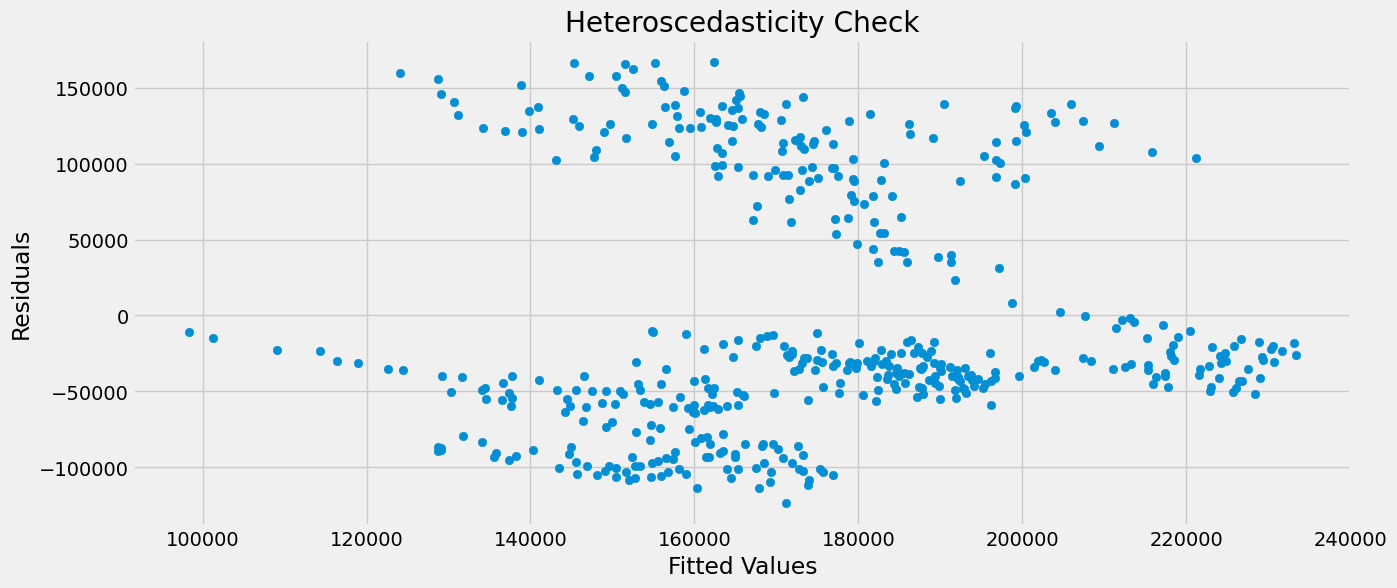

In [59]:
# prompt: Graphically check the Regression Residuals for Normality, Linearity, Independence, and Heteroscedasticity

import matplotlib.pyplot as plt
# Normality
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sm.qqplot(fit.resid, line='s', ax=ax1)
ax1.set_title('Q-Q Plot of Residuals')
sns.histplot(fit.resid, kde=True, ax=ax2)
ax2.set_title('Distribution of Residuals')
plt.show()

# Linearity
sns.regplot(x=fit.fittedvalues, y=Y1_train)
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.show()

# Independence
plot_acf(fit.resid)
plt.title('Autocorrelation of Residuals')
plt.show()

# Heteroscedasticity
plt.scatter(fit.fittedvalues, fit.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity Check')
plt.show()
